In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split-folders

In [ ]:
# Import
import zipfile
import os
import splitfolders
import tensorflow as tf
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Instal gdown jika belum terinstal
!pip install gdown

# Mengunduh file zip dari Google Drive
!gdown --id 1d7rouTa0_Oe_uXTK-jlSVo8VdBgyyOIL -O dataset.zip

# Path ke file zip yang telah diunduh
zip_path = 'dataset.zip'

# Path ke direktori tujuan setelah diekstrak
extract_dir = '/content/dataset'

# Membuat direktori tujuan jika belum ada
os.makedirs(extract_dir, exist_ok=True)

# Mengekstrak file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1d7rouTa0_Oe_uXTK-jlSVo8VdBgyyOIL
From (redirected): https://drive.google.com/uc?id=1d7rouTa0_Oe_uXTK-jlSVo8VdBgyyOIL&confirm=t&uuid=5c9262cc-a48b-4350-adef-8a9a168453d1
To: /content/dataset.zip
100% 394M/394M [00:05<00:00, 72.1MB/s]


In [ ]:
# Path ke direktori yang diekstrak
extract_dir = '/content/dataset/Indonesian Herb Leaf Dataset 3500'
output_dir = '/content/output'

# Membagi dataset menjadi 80% data pelatihan dan 20% data pengujian
splitfolders.ratio(extract_dir, output=output_dir, seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 3500 files [00:01, 1917.43 files/s]


In [ ]:
# Path ke direktori data pelatihan dan pengujian
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')

# Inisialisasi ImageDataGenerator untuk data pelatihan dan pengujian
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Generator untuk data pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Generator untuk data pengujian
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 2800 images belonging to 10 classes.
Found 700 images belonging to 10 classes.


In [ ]:
# Check the number of classes
print('Classes in training set:', train_generator.class_indices)
print('Classes in validation set:', val_generator.class_indices)

Classes in training set: {'Belimbing Wuluh': 0, 'Jambu Biji': 1, 'Jeruk Nipis': 2, 'Kemangi': 3, 'Lidah Buaya': 4, 'Nangka': 5, 'Pandan': 6, 'Pepaya': 7, 'Seledri': 8, 'Sirih': 9}
Classes in validation set: {'Belimbing Wuluh': 0, 'Jambu Biji': 1, 'Jeruk Nipis': 2, 'Kemangi': 3, 'Lidah Buaya': 4, 'Nangka': 5, 'Pandan': 6, 'Pepaya': 7, 'Seledri': 8, 'Sirih': 9}


In [ ]:
# Memuat model InceptionV3 yang telah dilatih pada ImageNet, tanpa lapisan atas (include_top=False)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Menambahkan lapisan akhir khusus untuk klasifikasi 10 kelas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Menambahkan dropout
predictions = Dense(10, activation='softmax')(x)

# Membuat model yang lengkap
model = Model(inputs=base_model.input, outputs=predictions)

# Membekukan lapisan dari base model agar tidak dilatih ulang
for layer in base_model.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=9
)

Epoch 1/9
87/87 [==============================] - 203s 2s/step - loss: 0.9308 - accuracy: 0.7269 - val_loss: 0.3017 - val_accuracy: 0.9107
Epoch 2/9
87/87 [==============================] - 192s 2s/step - loss: 0.3807 - accuracy: 0.8743 - val_loss: 0.2877 - val_accuracy: 0.9077
Epoch 3/9
87/87 [==============================] - 193s 2s/step - loss: 0.2739 - accuracy: 0.9104 - val_loss: 0.2311 - val_accuracy: 0.9345
Epoch 4/9
87/87 [==============================] - 194s 2s/step - loss: 0.1837 - accuracy: 0.9393 - val_loss: 0.1749 - val_accuracy: 0.9509
Epoch 5/9
87/87 [==============================] - 195s 2s/step - loss: 0.1615 - accuracy: 0.9469 - val_loss: 0.1864 - val_accuracy: 0.9420
Epoch 6/9
87/87 [==============================] - 192s 2s/step - loss: 0.1562 - accuracy: 0.9462 - val_loss: 0.1606 - val_accuracy: 0.9345
Epoch 7/9
87/87 [==============================] - 195s 2s/step - loss: 0.1141 - accuracy: 0.9639 - val_loss: 0.1543 - val_accuracy: 0.9435
Epoch 8/9
87/87 [===

In [ ]:
# Menampilkan summary dari model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

In [ ]:
# Fungsi untuk mengevaluasi apakah model overfitting, underfitting, atau good fit
def evaluate_model(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Plotting the loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Evaluating the model fit
    final_train_loss = train_loss[-1]
    final_val_loss = val_loss[-1]
    final_train_acc = train_acc[-1]
    final_val_acc = val_acc[-1]

    if final_train_loss > final_val_loss and final_train_acc < final_val_acc:
        print("Kesimpulan: Model mengalami underfitting.")
    elif final_train_loss < final_val_loss and abs(final_train_loss - final_val_loss) > 0.1:
        print("Kesimpulan: Model mengalami overfitting.")
    else:
        print("Kesimpulan: Model memiliki good fit.")

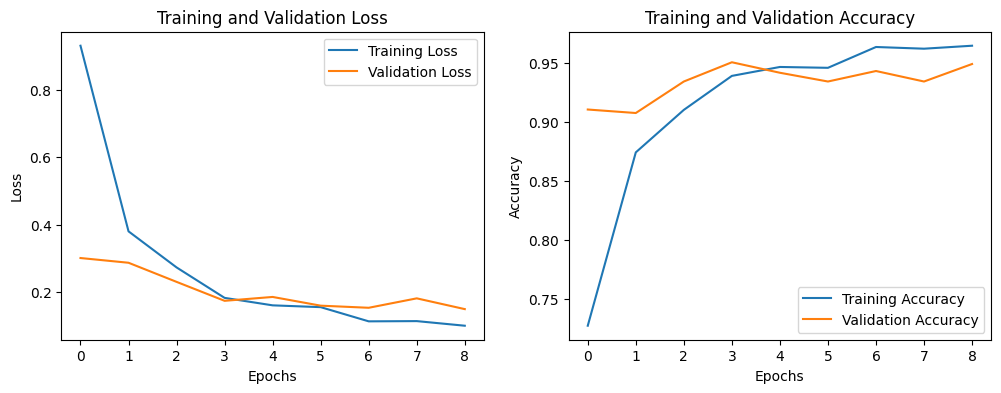

Kesimpulan: Model memiliki good fit.


In [ ]:
# Evaluasi model
evaluate_model(history)

1/1 [==============================] - 1s 1s/step


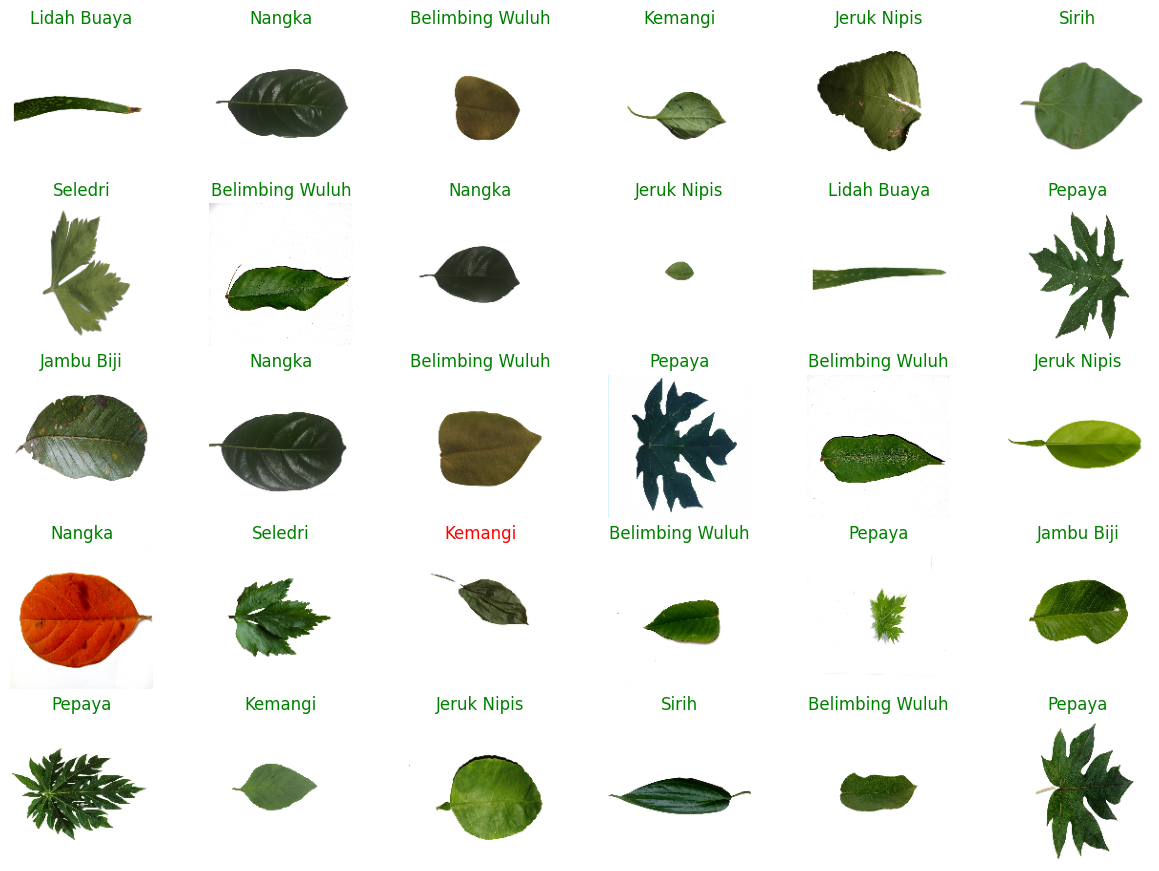

In [ ]:
# Mengambil gambar dan label dari generator validasi
img, labels = next(val_generator)

# Melakukan prediksi menggunakan model
predictions = model.predict(img)

# Mengambil kelas nama
class_names = list(val_generator.class_indices.keys())

# Menampilkan gambar-gambar dengan prediksi dan labelnya
plt.figure(figsize=(15, 13))
for i in range(30):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img[i])

    # Mengambil prediksi dan label
    pred = np.argmax(predictions[i])
    true_label = np.argmax(labels[i])  # Mengambil indeks kelas yang benar

    # Mengecek apakah prediksi benar atau salah
    if pred == true_label:
        plt.title(class_names[pred], color='green')
    else:
        plt.title(class_names[pred], color='red')

    plt.axis("off")

plt.show()

In [ ]:
# Simpan model dalam format H5
model.save('ModelHerbPedia.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip uninstall tflite-support -y

Found existing installation: tflite-support 0.4.4
Uninstalling tflite-support-0.4.4:
  Successfully uninstalled tflite-support-0.4.4


In [ ]:
# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
# Define the input and output tensors with their corresponding metadata
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

In [ ]:
# Add metadata
def representative_dataset_gen():
    for _ in range(num_calibration_steps):
        # Provide a representative dataset to calibrate the quantization
        yield [input_data]
converter.representative_dataset = representative_dataset_gen

In [ ]:
# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Simpan model TFLite dalam file
with open('ModelHerbPedia.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Unduh file H5 dan TFLite
files.download('ModelHerbPedia.h5')
files.download('ModelHerbPedia.tflite')